# Lecture 3 - Exercise

## Code Header

- **Group ID**: 742
- **Members**: 
	- Lukas Bisgaard Kristensen
	- Mads Østergaard Dinesen
	- Máté Tallósi
	- Tudor-Razvan Tatar
- **Date**: 15/09/2022
- **Lecture**: 3 - “Parametric and nonparametric methods” 
- **Dependencies**: Jupyter Notebook, numpy=1.21.5, matplotlib=3.5.2, scipy=1.7.3
- **Python version**: 3.9+
- **Functionality**: We trained a model based on a probability distribution function on the two given datasets and tested it on the unseen data.

[*Github Link*](https://github.com/tallosim/aau-machine-learning/blob/main/Lecture%203/Notebooks/solution.ipynb)

## Solutions

### Task (a)

**Accuracy**: 0.9097187962506167

### Task (b)

**Accuracy**: 0.8889770023790642

### Task (c)

**Accuracy**: 0.7581284694686756

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read the train and test datas

In [2]:
def read_data(file_path):
    with open(file_path) as f:
        raw = f.read().splitlines()
    
    array = np.array([list(filter(lambda x: x != '', row.split(' '))) for row in raw], dtype=float)
    
    if array.shape[1] == 1:
        return array[:, 0]
    
    return array

In [3]:
# Read in the train data
trn_x = read_data('../Datasets/trn_x.txt')
trn_x_class = read_data('../Datasets/trn_x_class.txt')
trn_y = read_data('../Datasets/trn_y.txt')
trn_y_class = read_data('../Datasets/trn_y_class.txt')

trn_x.shape, trn_x_class.shape, trn_y.shape, trn_y_class.shape

((6742, 2), (6742,), (5421, 2), (5421,))

In [4]:
# Concanate the train datas
trn_xy = np.concatenate((trn_x, trn_y), axis=0)
trn_xy_class = np.concatenate((trn_x_class, trn_y_class), axis=0)

trn_xy.shape, trn_xy_class.shape

((12163, 2), (12163,))

In [5]:
# Read in the test data
tst_xy = read_data('../Datasets/tst_xy.txt')
tst_xy_class = read_data('../Datasets/tst_xy_class.txt')

tst_xy.shape, tst_xy_class.shape

((2027, 2), (2027,))

## Plot the train and test datas

In [6]:
[x_min, y_min] = np.min(trn_xy, axis=0)
[x_max, y_max] = np.max(trn_xy, axis=0)

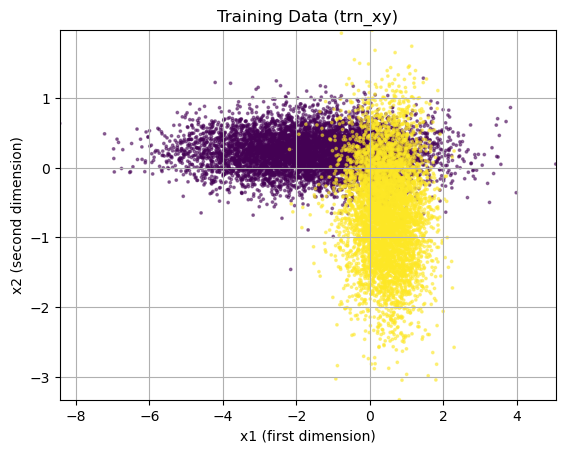

In [7]:
plt.scatter(trn_xy[:, 0], trn_xy[:, 1], c=trn_xy_class, s=3, alpha=0.5)

plt.title('Training Data (trn_xy)')
plt.xlabel('x1 (first dimension)')
plt.ylabel('x2 (second dimension)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid()

plt.savefig('../Images/trn_xy.png')

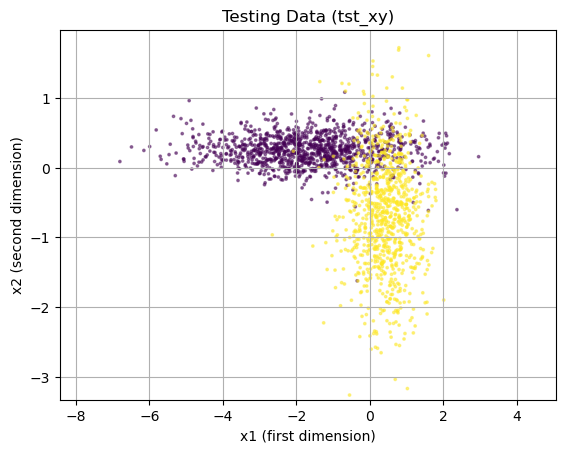

In [8]:
plt.scatter(tst_xy[:, 0], tst_xy[:, 1], c=tst_xy_class, s=3, alpha=0.5)

plt.title('Testing Data (tst_xy)')
plt.xlabel('x1 (first dimension)')
plt.ylabel('x2 (second dimension)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid()

plt.savefig('../Images/tst_xy.png')

In [9]:
from scipy.stats import multivariate_normal

In [10]:
mean_x = np.mean(trn_x, axis=0)
mean_y = np.mean(trn_y, axis=0)

cov_x = np.cov(trn_x.T)
cov_y = np.cov(trn_y.T)

prior_x = trn_x.shape[0] / trn_xy.shape[0]
prior_y = trn_y.shape[0] / trn_xy.shape[0]

rv_x = multivariate_normal(mean=mean_x, cov=cov_x)
rv_y = multivariate_normal(mean=mean_y, cov=cov_y)

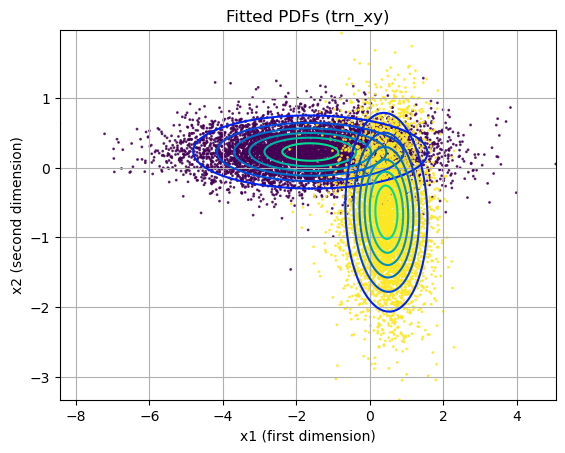

In [11]:
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.dstack((x, y))

plt.contour(x, y, rv_x.pdf(pos) * prior_x, cmap='winter', alpha=1)
plt.contour(x, y, rv_y.pdf(pos) * prior_y, cmap='winter', alpha=1)
plt.scatter(trn_xy[:, 0], trn_xy[:, 1], c=trn_xy_class, s=1, alpha=0.8)

plt.title('Fitted PDFs (trn_xy)')
plt.xlabel('x1 (first dimension)')
plt.ylabel('x2 (second dimension)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid()

plt.savefig('../Images/pdf_trn_xy.png')

In [12]:
class PDFClassifier:
    def __init__(self, priors={}, pdfs={}, classes=[]):
        self.priors = priors
        self.pdfs = pdfs
        self.classes = classes
    
    def fit(self, X, y):
        if (X.shape[0] != y.shape[0]):
            raise ValueError('X and y must have the same number of samples')
        
        self.classes = np.unique(y)
        
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.pdfs[c] = multivariate_normal(mean=np.mean(X_c, axis=0), cov=np.cov(X_c.T))
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        for i, x in enumerate(X):
            probs = [self.pdfs[c].pdf(x) * self.priors[c] for c in self.classes]
            y_pred[i] = self.classes[np.argmax(probs)]
        
        return y_pred
    
    def score(self, X, y):
        if (X.shape[0] != y.shape[0]):
            raise ValueError('X and y must have the same number of samples')
        
        y_pred = self.predict(X)
        return np.sum(y_pred == y) / y.shape[0]

## Task (a)

In [13]:
model = PDFClassifier()

model.fit(trn_xy, trn_xy_class)

model.score(tst_xy, tst_xy_class)

0.9097187962506167

## Task (b)

Uniform prior over the space of hypotheses: takes all of the priors over the same values (in case of 2 classes 0.5-0.5)

In [14]:
# Read in the test data
tst_xy_126 = read_data('../Datasets/tst_xy_126.txt')
tst_xy_126_class = read_data('../Datasets/tst_xy_126_class.txt')

tst_xy_126.shape, tst_xy_126_class.shape

((1261, 2), (1261,))

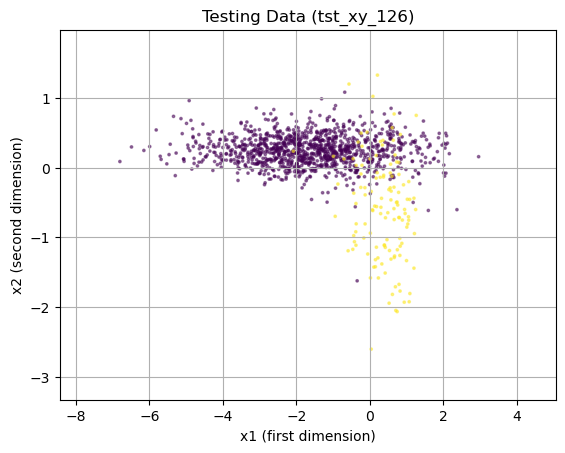

In [15]:
plt.scatter(tst_xy_126[:, 0], tst_xy_126[:, 1], c=tst_xy_126_class, s=3, alpha=0.5)

plt.title('Testing Data (tst_xy_126)')
plt.xlabel('x1 (first dimension)')
plt.ylabel('x2 (second dimension)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid()

plt.savefig('../Images/tst_xy_126.png')

In [16]:
model = PDFClassifier()

model.fit(trn_xy, trn_xy_class)

model.priors[1.0] = 0.5
model.priors[2.0] = 0.5

model.score(tst_xy_126, tst_xy_126_class)

0.8889770023790642

## Task (c)

In [17]:
model = PDFClassifier()

model.fit(trn_xy, trn_xy_class)

model.priors[1.0] = 0.1 # Class x
model.priors[2.0] = 0.9 # Class y

model.score(tst_xy_126, tst_xy_126_class)

0.7581284694686756

## Extra - Use KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=12)

model.fit(trn_xy, trn_xy_class)

model.score(tst_xy, tst_xy_class)

0.9126788357178096

In [20]:
accuracies = []

for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trn_xy, trn_xy_class)
    accuracy = model.score(tst_xy, tst_xy_class)
    
    accuracies.append([k, accuracy])
    
accuracies = np.array(accuracies)

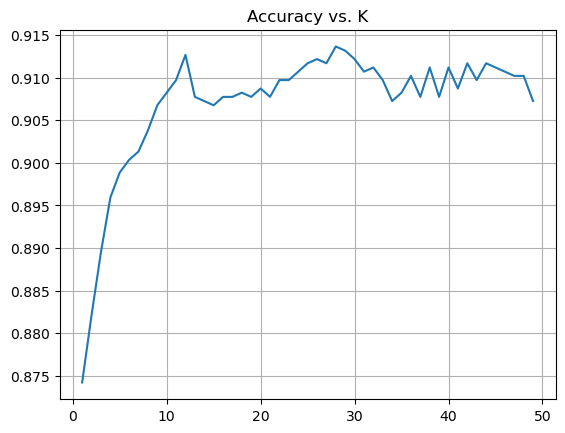

In [21]:
plt.plot(accuracies[:, 0], accuracies[:, 1])
plt.title('Accuracy vs. K')
plt.grid()